# Over and underfitting and the gift of prior knowledge

## Imports

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np

from lmfit import Model

## Define our data generating process

In [15]:
def lennard_jones(x):
    return 4 * (1/x**12 - 1/x**6)

In [40]:
def plot_lj():
    x = np.linspace(0.1, 10, 100)
    y = lennard_jones(x)
    plt.plot(x, y)
    plt.xlabel(r"r")
    plt.ylabel(r"U(r)")
    plt.ylim(-2,4)

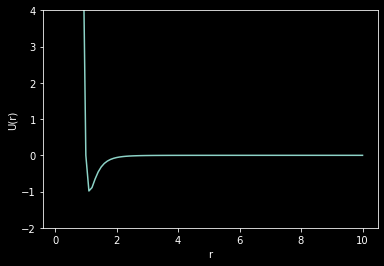

In [41]:
plot_lj()

In [102]:
def noisy_lennard_jones(x, noise=0.1):
    return lennard_jones(x) + np.random.normal(0, noise, len(x))

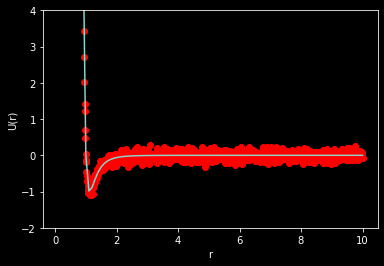

In [152]:
x = np.linspace(0.8, 10, 1000)
plot_lj()
plt.scatter(x, noisy_lennard_jones(x), label="Noisy", c='r')

In [153]:
y = noisy_lennard_jones(x)
x = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Fit a simple linear model

In [154]:
# train the model

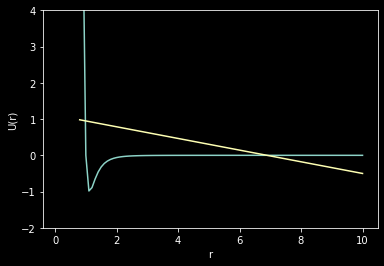

In [155]:
plot_lj()
plt.plot(x.flatten(), y_pred.flatten(), label="Linear")

## Fit a polynomial

In [156]:
# initialize the polynomial features


In [157]:
# create polynomial features
x_poly = 

Make a train/test split

In [159]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2)

Now, fit a linear regression model to the polynomial features. Plot the model on top of the data and the true LJ potential.

In [160]:
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train_poly)
y_poly_pred = model_poly.predict(x_poly)

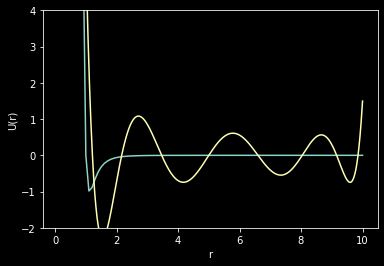

In [161]:
plot_lj()
plt.plot(x, y_poly_pred, label="Polynomial")

## Fit to LJ function   

Lastly, we assume we know the underlying function is a Lennard-Jones potential. We can use this information to fit the data with a Lennard-Jones potential. We can use the lmfit package to do this. The lmfit package is a wrapper around scipy.optimize.curve_fit . 

In [174]:
x = np.linspace(0.8, 10, 1000)
y = noisy_lennard_jones(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [163]:
def lj_func(x, eps, sig):
    return 4 * eps * (sig/x)**12 - 4 * eps * (sig/x)**6

In [166]:
lj_model = Model(lj_func)

In [167]:
lj_params = lj_model.make_params(eps=1, sig=1)

In [175]:
result = lj_model.fit(y_train, lj_params, x=x_train.flatten())

In [176]:
predictions = lj_model.eval(result.params, x=x.flatten())

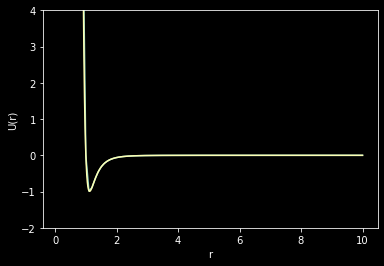

In [178]:
plot_lj()
plt.plot(x.flatten(), predictions, label="LJ")

How could we have done this with our `LinearRegression` model?
To answer this question, think about what feature transformations we would have needed to perform.